Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import datetime as dt


Carregando o dataset 

In [2]:
#Carregando dados 
df = pd.read_csv("Data - data (2).csv.csv")

In [3]:
#Lendos os dados
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


Analisando informações gerais do dataset 

In [4]:
#Vendo informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Analisando informações estatísticas do dataset

In [5]:
#Vendo infos estatisticas
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Identificando e tratando valores nulos

In [6]:
#Verfificando dados nulos
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#Vendo dados nulos na coluna CustomerID
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [8]:
#Dropando valores nulos CustomerID
df.dropna(subset=['CustomerID'],inplace=True)

Identidificando dados nulos ou menores que 0

In [9]:
#Filtrando dados nulos ou <0 na coluna UnitPrice 
df.filter(like='UnitPrice')
filtred_UnitedPrice = df[df['UnitPrice'].isna() | (df['UnitPrice'] < 0)]
filtred_UnitedPrice.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Filtrando valores da coluna UnitPrice acima de 0

In [10]:
#Filtrando preços somente aciima de 0
df = df[df['UnitPrice'] > 0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [11]:
#Filtrando dados nulos ou menor que 0 na coluna Quantity
df[df['Quantity'].isna() | (df['Quantity'] < 0)]

#Deixando o dataset somente com valores em Quantity acima de 0
df = df[df['Quantity'].isna() | (df['Quantity'] > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [12]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Tratando dados duplicados 

In [13]:
#Identificar linhas duplicadas
df[df.duplicated()]

#Excluindo valores duplicados 
df = df.drop_duplicates()

In [14]:
#Vendo tipos dos dados 
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Alterando os tipos de dados de colunas específicas 

In [15]:
 #Mudando o tipo de dado da coluna InvoiceDate para data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format="%m/%d/%Y %H:%M")

In [16]:
#Mudando o tipo de dado da coluna CustomerID para int
df = df.astype({"CustomerID": object})


Visualizando outliers

<Axes: >

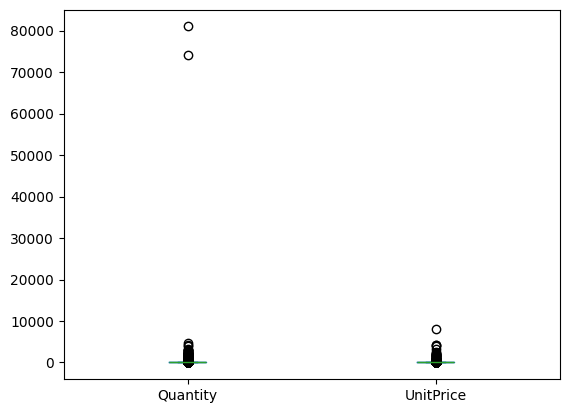

In [17]:
# Visualizando outliers
df.plot.box()

<Axes: ylabel='Quantity'>

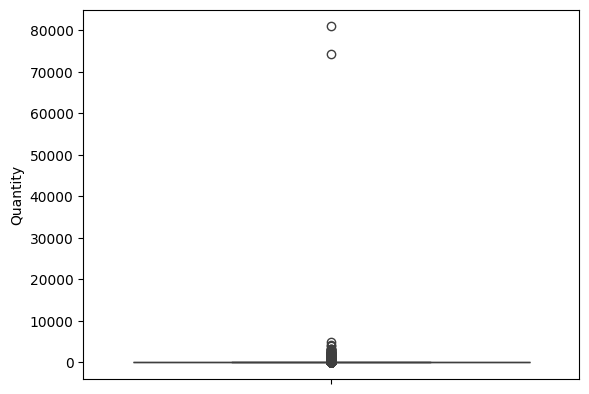

In [18]:
# Visualizando outliers na coluna Quantity
sns.boxplot(df['Quantity'])

<Axes: ylabel='UnitPrice'>

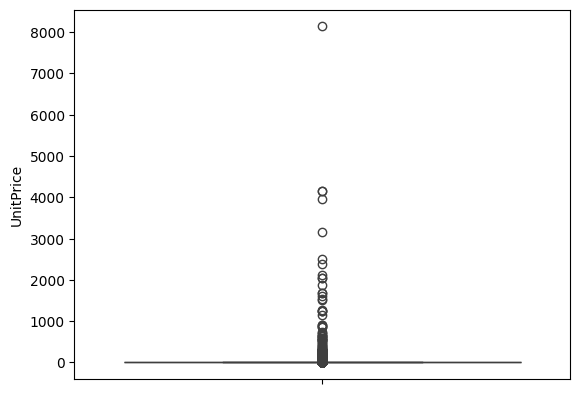

In [19]:
# Visualizando outliers na coluna UnitedPrice 
sns.boxplot(df['UnitPrice'])

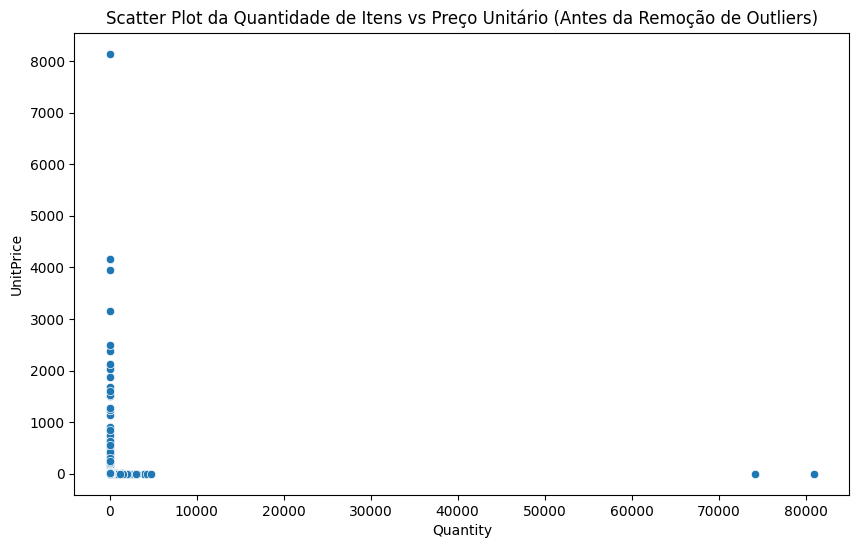

In [20]:
# Visualizar os outliers usando scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot da Quantidade de Itens vs Preço Unitário (Antes da Remoção de Outliers)')
plt.show()


Removendo outliers extremos, filtrando os valores

In [21]:
# Remover outliers extremos (quantidade superior a 10.000 e preço unitário maior que 5.000)
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

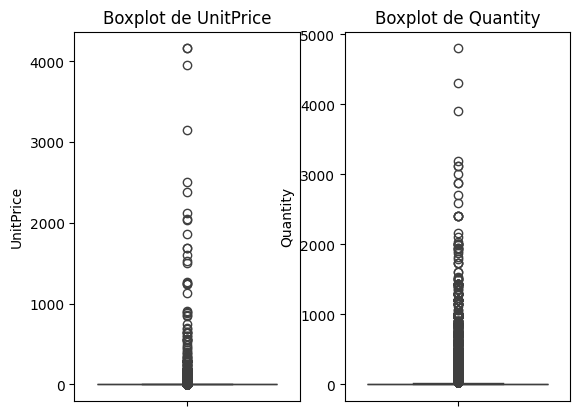

In [22]:
# Gráfico UnitPrice
plt.subplot(1, 2, 1)
sns.boxplot(y=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')

# Gráfico Quantity
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot de Quantity')

plt.show()

Nova coluna - Preço total de compra 

In [23]:
# Criando coluna adicional do preço total da compra 
df['Total_price'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Ultima data de compra do dataset

In [24]:
# Calculando a data da ultima compra do df
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Plotando gráficos

In [25]:
#Top 10 países com maior valor em vendas
top10_sales_country = df.groupby('Country')['Total_price'].sum().sort_values(ascending=False).head(10)
top10_sales_country

#Top 10 produtos mais vendidos
top10_sales_product = df.groupby('Description')['Total_price'].sum().sort_values(ascending=False).head(10)
top10_sales_product



Description
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
POSTAGE                                69661.21
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
CHILLI LIGHTS                          46265.11
PAPER CHAIN KIT 50'S CHRISTMAS         42584.13
Name: Total_price, dtype: float64

Top 10 países com maior valor em vendas 

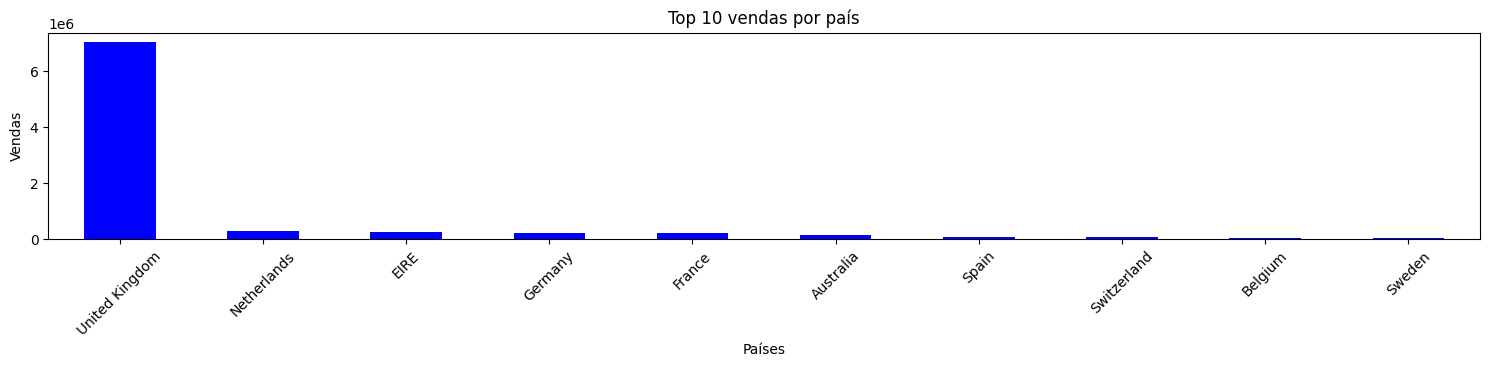

In [26]:
#Gráfico top países produtos em vendas
fig = plt.figure(figsize=(15,4))

top10_sales_country.plot(kind='bar',color='blue')

plt.title('Top 10 vendas por país')
plt.xlabel('Países')
plt.ylabel('Vendas')
plt.tight_layout()

plt.xticks(rotation=45);

Top 10 produtos mais vendidos 

Text(0, 0.5, 'Vendas')

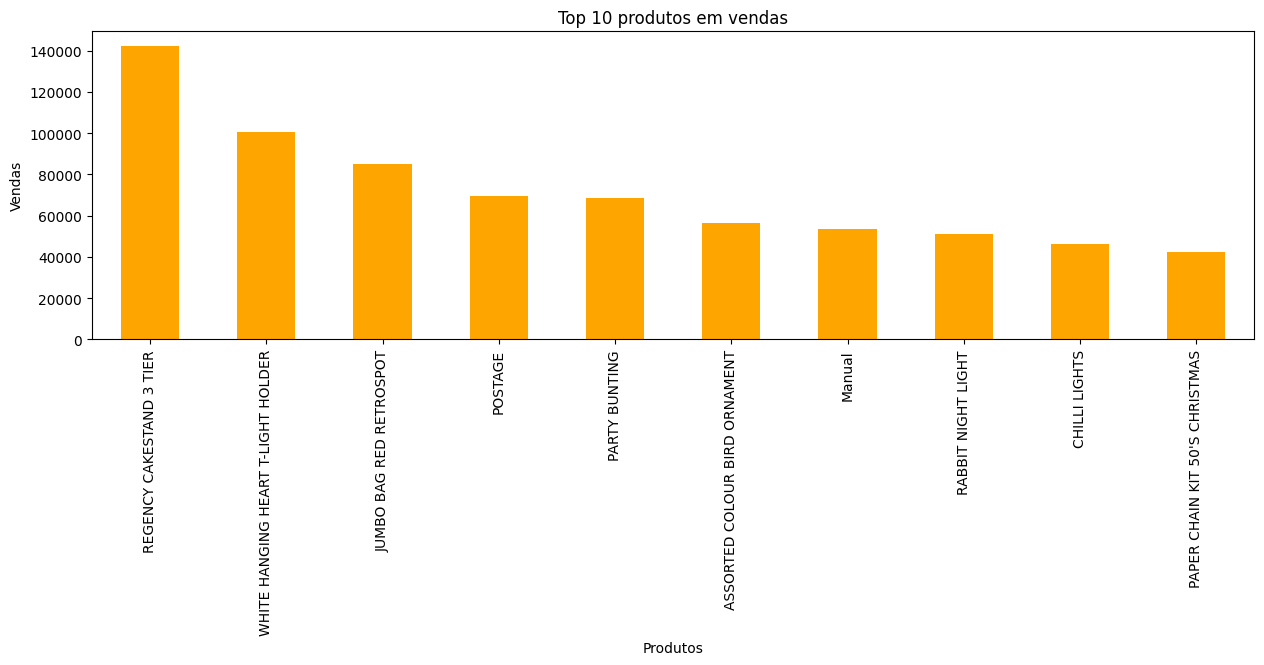

In [27]:
#Gráfico top 10 produtos em vendas
fig = plt.figure(figsize=(15,4))

top10_sales_product.plot(kind='bar',color='orange')

plt.title('Top 10 produtos em vendas')
plt.xlabel('Produtos')
plt.ylabel('Vendas')



Valor de venda total por mês

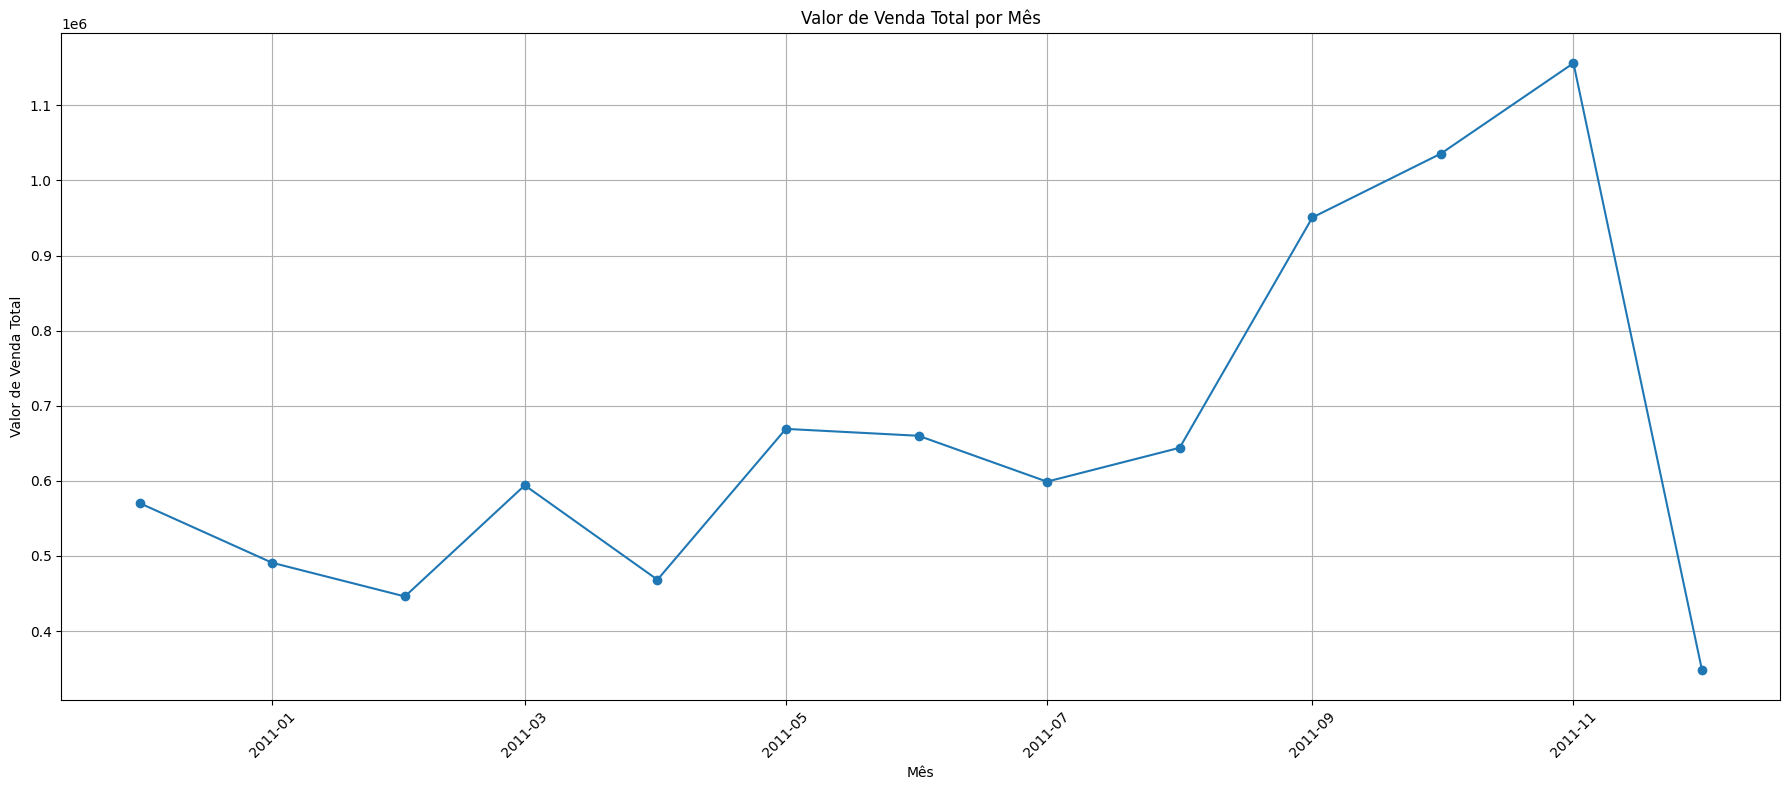

In [28]:
#Extrair o ano e o mês de InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Valor total de vendas por mês

df.head()
sales_total_month = df.groupby('YearMonth')['Total_price'].sum().head(15);

#Convertendo o indice de periodo para datetime
sales_total_month.index = sales_total_month.index.to_timestamp()


# Criando o gráfico de linha
plt.figure(figsize=(18, 8))
plt.plot(sales_total_month.index, sales_total_month.values, marker='o')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()



Valor de venda total por mês e por país (considere apenas os top 10)

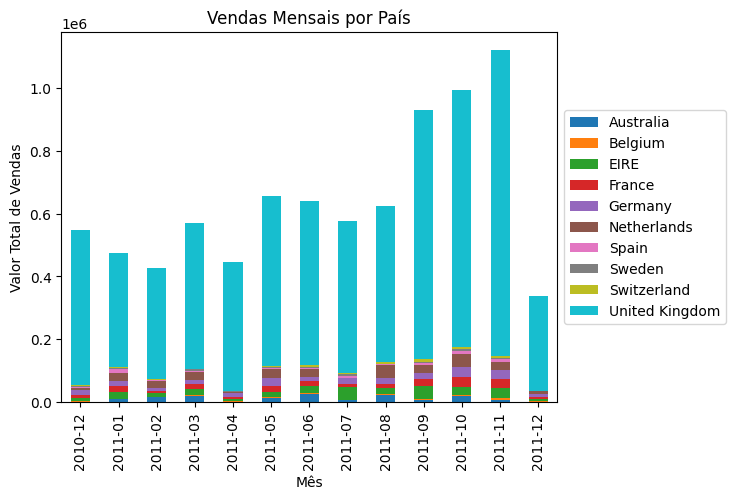

In [29]:
#Valor de venda total por mês e por país (considere apenas os top 10)

#Extrair o ano e o mês de InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

#Agrupando
top10_sales_countries = df.groupby('Country')['Total_price'].sum().sort_values(ascending=False).head(10);

#Filtrar o DataFrame original para incluir apenas os top 10 países
top_countries = top10_sales_countries.index
df_top_countries = df[df['Country'].isin(top_countries)]

#Agrupar por YearMonth e Country, somando os valores de Total_price
monthly_country_sales = df_top_countries.groupby(['YearMonth', 'Country'])['Total_price'].sum().unstack().fillna(0)

# Criar figura e eixos
fig, ax = plt.subplots()

# Plotar o gráfico de barras
monthly_country_sales.plot(kind='bar', ax=ax, stacked=True)

# Definir rótulos e título
ax.set_xlabel('Mês')
ax.set_ylabel('Valor Total de Vendas')
ax.set_title('Vendas Mensais por País')

# Adicionar legenda
plt.legend(monthly_country_sales.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.show()


In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


Calculo do RFM

In [35]:
# Criando uma data de referencia
data_referencia = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Agrupar os dados por cliente, e aplicando os cálculos às colunas data (diferença de dias para Recência), número do pedido (contagem para frequência) e Preço total (soma para Valor Monetário)
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (data_referencia - x.max()).days,
                                      'InvoiceNo':'count','Total_price':'mean'})

# Renomeando as colunas
rfm = rfm.rename(columns={'InvoiceDate':'Recência','InvoiceNo':'Frequência','Total_price':'TicketMédio'})
rfm


# Calculando os níveis RFM
rfm['RecênciaRank'] = pd.qcut(rfm['Recência'], q=3, labels=["Baixa", "Média", "Alta"])
rfm['FrequênciaRank'] = pd.qcut(rfm['Frequência'], q=3, labels=["Baixa", "Média", "Alta"])
rfm['TicketMédioRank'] = pd.qcut(rfm['TicketMédio'], q=3, labels=["Baixa", "Média", "Alta"])



In [36]:
rfm.head(20)

,Recência,Frequência,TicketMédio,RecênciaRank,FrequênciaRank,TicketMédioRank
CustomerID,,,,,,
12347.0,2,182,23.681319,Baixa,Alta,Alta
12348.0,75,31,57.975484,Média,Média,Alta
12349.0,19,73,24.076027,Baixa,Alta,Alta
12350.0,310,17,19.670588,Alta,Baixa,Média
12352.0,36,85,29.482824,Média,Alta,Alta
12353.0,204,4,22.250000,Alta,Baixa,Alta
12354.0,232,58,18.610345,Alta,Média,Média
12355.0,214,13,35.338462,Alta,Baixa,Alta
12356.0,23,59,47.651356,Baixa,Média,Alta


In [37]:
rfm.tail(20)

,Recência,Frequência,TicketMédio,RecênciaRank,FrequênciaRank,TicketMédioRank
CustomerID,,,,,,
18259.0,25,42,55.680952,Baixa,Média,Alta
18260.0,173,133,19.762030,Alta,Alta,Média
18261.0,43,21,15.440000,Média,Baixa,Média
18262.0,140,13,11.498462,Alta,Baixa,Baixa
18263.0,26,61,19.887869,Média,Média,Média
18265.0,72,46,17.424130,Média,Média,Média
18268.0,134,1,25.500000,Alta,Baixa,Alta
18269.0,366,7,24.085714,Alta,Baixa,Alta
18270.0,38,11,25.740909,Média,Baixa,Alta
